In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#Read CSV
data = pd.read_csv("data/wallacecommunications.csv")
#Print data insights to check info, null or NaN rows and sample data
print(f"Info: \n {data.info()}")
print(f"null counts:\n {data.isnull().sum()}")
print(f"na counts: \n {data.isna().sum()}")
print(f"sample rows : \n {data.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

Understanding of data is that:
1. There are no null or NaN rows
2. ID is a column that is just identifier and has no direct role in prediction
3. There are 3 binary columns and 1 target binary column
4. curren_balance can be negative

In [19]:
#Find unique values for each
for data_col in data.columns:
    print(f"{data_col}: {data[data_col].unique()}")

ID: [32390233 41226029 85498057 ... 14476386 63746806 18687856]
town: ['Bristol' 'Basildon' 'Blackburn' 'Oldham' 'Middlesbrough' 'Poole'
 'Stockport' 'Wolverhampton' 'Eastbourne' 'Weston-super-Mare' 'London'
 'Sheffield' 'Leeds' 'Raleigh' 'Cambridge' 'Kingston upon Hull'
 'Milton Keynes' 'Nottingham' 'Woking' 'Birmingham' 'Basingstoke' 'Oxford'
 'Luton' 'Manchester' 'Glasgow' 'Worthing' 'Darlington' 'Sunderland'
 'Birkenhead' 'Chelmsford' 'Cardiff' 'Cheltenham' 'Portsmouth' 'Bath'
 'Chester' 'Bradford' 'Coventry' 'Liverpool' 'Bournemouth' 'Dundee'
 'County Down' 'Exeter' 'Derby' 'Swindon' 'Edinburgh' 'Hartlepool'
 'Gateshead' 'Rochdale' 'Reading' 'Hemel Hempstead' 'Wakefield' 'Belfast'
 'Worcester' 'Newport' 'Warrington' 'Sutton Coldfield' 'Solihull'
 'Telford' 'Northampton' 'Sale' 'Chesterfield' 'Brighton' 'Stevenage'
 'Leicester' 'Huddersfield' 'York' 'Newcastle upon Tyne' 'Preston'
 'Gloucester' 'Southend-on-Sea' 'Swansea' 'Peterborough' 'Aberdeen'
 'Watford' 'Gillingham' 'St Albans

From the unique values start analyzing important ones, town, country
Correct the typos for last_contact, last_contact_this_campaign_month and housing

In [20]:
data.describe()

,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,5.066200e+04,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,5.502871e+07,40.979373,13.991210,3.005093,15.768525,2.713217,42.644408,0.640283
std,2.598596e+07,10.919324,30.899163,1.409003,8.347083,3.052227,102.238078,2.358029
min,1.000073e+07,18.000000,-80.190000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,3.249964e+07,32.000000,0.820000,2.000000,8.000000,1.000000,-1.000000,0.000000
50%,5.501127e+07,39.000000,4.720000,3.000000,16.000000,2.000000,-1.000000,0.000000
75%,7.748809e+07,48.000000,14.950000,4.000000,21.000000,3.000000,-1.000000,0.000000
max,9.999952e+07,95.000000,984.170000,5.000000,31.000000,63.000000,871.000000,275.000000


In [21]:
data['new_contract_this_campaign'].value_counts(normalize=True)

new_contract_this_campaign
no     0.804607
yes    0.195393
Name: proportion, dtype: float64

Data is not balanced. Too many no to very few yes. To be handled with SMOTE or class_weights

In [22]:
data_old = data[data['contacted_during_previous_campaign']>20]
data_old.outcome_previous_campaign.value_counts()

outcome_previous_campaign
other      35
failure    26
success     4
Name: count, dtype: int64

Check if more contact is made for a success of previous outcome. It seems that is not the case.

In [23]:
data_new = data[data['this_campaign']>20]
data_new.new_contract_this_campaign.value_counts()

new_contract_this_campaign
no     256
yes      8
Name: count, dtype: int64

Do the same with this_campaign. This also has no direct relationship and more calls have yielded no results

In [24]:
data['country'].value_counts()

country
UK          50657
France          2
Germany         1
USA             1
Portugal        1
Name: count, dtype: int64

Country can be ignored as this is home address and people live in UK and country has no direct relation to prediction and from below table it is clear that the town is still in UK which makes country column no use for our current analysis

In [25]:
data[data['country']!= 'UK']['town']


632       Basildon
658       Aberdeen
747        Norwich
1338          Sale
6746    Birmingham
Name: town, dtype: object

In [26]:
d_count = data.groupby("job")['new_contract_this_campaign'].value_counts().unstack(fill_value=0)
d_count['percentage'] = d_count['yes']/(d_count['yes']+d_count['no'])*100
d_count.sort_values(by='percentage')


new_contract_this_campaign,no,yes,percentage
job,,,
blue-collar,9133,1319,12.619594
entrepreneur,1404,226,13.865031
services,3849,690,15.201586
housemaid,1130,207,15.482423
technician,6892,1572,18.572779
self-employed,1439,335,18.883878
unknown,266,63,19.148936
admin.,4688,1177,20.068201
management,8385,2464,22.711771


The %age of yes and no varies huge and this cannot be dropped and can be a driving force for the prediction. So keep the job column

In [27]:
d_count = data.groupby("married")['new_contract_this_campaign'].value_counts().unstack(fill_value=0)
d_count['percentage'] = d_count['yes']/(d_count['yes']+d_count['no'])*100
d_count.sort_values(by='percentage')


new_contract_this_campaign,no,yes,percentage
married,,,
married,24889,5156,17.160925
divorced,4690,1159,19.815353
single,11184,3584,24.268689


The variation for married column is very small and hence can be dropped

In [28]:
d_count = data.groupby("conn_tr")['new_contract_this_campaign'].value_counts().unstack(fill_value=0)
d_count['percentage'] = d_count['yes']/(d_count['yes']+d_count['no'])*100
d_count.sort_values(by='percentage')

new_contract_this_campaign,no,yes,percentage
conn_tr,,,
3,8259,1921,18.870334
5,8121,1964,19.474467
2,8217,2017,19.708814
4,8194,2022,19.792482
1,7972,1975,19.855233


The variation for conn_tr column is very small and hence can be dropped. Also, there is no specific role for this conn_tr which by itself or with other features showing driving force. From belo cell, it is clear that it is not even number of connections per household. Hence drop this column

In [29]:
d_count = data.groupby("married")['conn_tr'].value_counts().unstack(fill_value=0)
d_count

conn_tr,1,2,3,4,5
married,,,,,
divorced,1105,1219,1160,1182,1183
married,5899,6071,6079,6075,5921
single,2943,2944,2941,2959,2981


In [31]:
d_count = data.groupby("town")['new_contract_this_campaign'].value_counts().unstack(fill_value=0)
d_count['percentage'] = d_count['yes']/(d_count['yes']+d_count['no'])*100


In [32]:
pd.set_option('display.max_rows', 500)
d_count.sort_values(by='percentage')

new_contract_this_campaign,no,yes,percentage
town,,,
Colchester,368,63,14.617169
Wakefield,327,57,14.843750
Kingston upon Hull,357,65,15.402844
Southend-on-Sea,316,59,15.733333
Newcastle upon Tyne,319,61,16.052632
Birkenhead,330,64,16.243655
Derby,319,62,16.272966
Huddersfield,328,64,16.326531
Hastings,327,65,16.581633


From above it is very clear that town has similar ratio of convertion and hence can be dropped too

<Axes: >

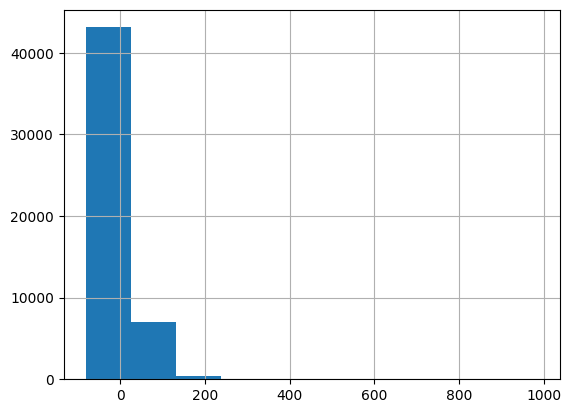

In [60]:
data['current_balance'].hist()

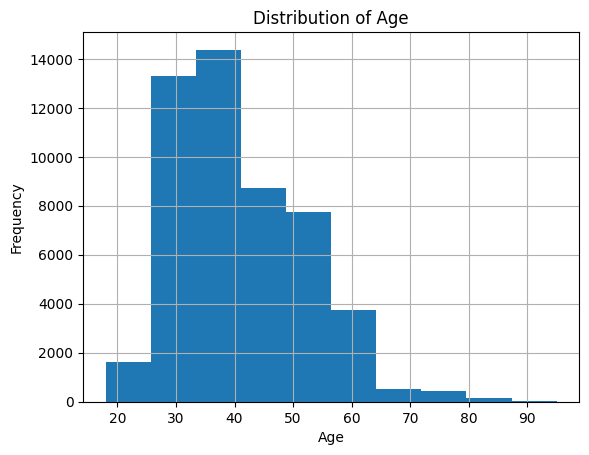

In [33]:
ax = data['age'].hist() 
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Age')
plt.show()

In [62]:
data.groupby('new_contract_this_campaign')['current_balance'].mean()


new_contract_this_campaign
0    13.016576
1    18.004650
Name: current_balance, dtype: float64

In [ ]:
data['new_contract_this_campaign'] = data['new_contract_this_campaign'].map({'yes':1, 'no':0}).astype(int)

In [63]:
data.corr(numeric_only=True)

,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,new_contract_this_campaign
ID,1.000000,-0.001237,-0.004142,0.008362,0.000980,-0.005354,-0.002558,-0.000492,-0.003082
age,-0.001237,1.000000,0.101688,-0.005501,-0.007633,0.001733,-0.017208,0.005704,0.030501
current_balance,-0.004142,0.101688,1.000000,-0.001223,0.007047,-0.014508,0.007244,0.019504,0.064008
conn_tr,0.008362,-0.005501,-0.001223,1.000000,0.004237,0.003277,-0.005558,-0.000411,-0.002382
last_contact_this_campaign_day,0.000980,-0.007633,0.007047,0.004237,1.000000,0.156636,-0.089422,-0.053263,-0.038615
this_campaign,-0.005354,0.001733,-0.014508,0.003277,0.156636,1.000000,-0.093053,-0.037818,-0.091829
days_since_last_contact_previous_campaign,-0.002558,-0.017208,0.007244,-0.005558,-0.089422,-0.093053,1.000000,0.460869,0.126678
contacted_during_previous_campaign,-0.000492,0.005704,0.019504,-0.000411,-0.053263,-0.037818,0.460869,1.000000,0.112417
new_contract_this_campaign,-0.003082,0.030501,0.064008,-0.002382,-0.038615,-0.091829,0.126678,0.112417,1.000000


The biggest correlation is age, current_balance, days_since_last_contact_precious_campaign, contacted_during_previous_campaign, this_campaign

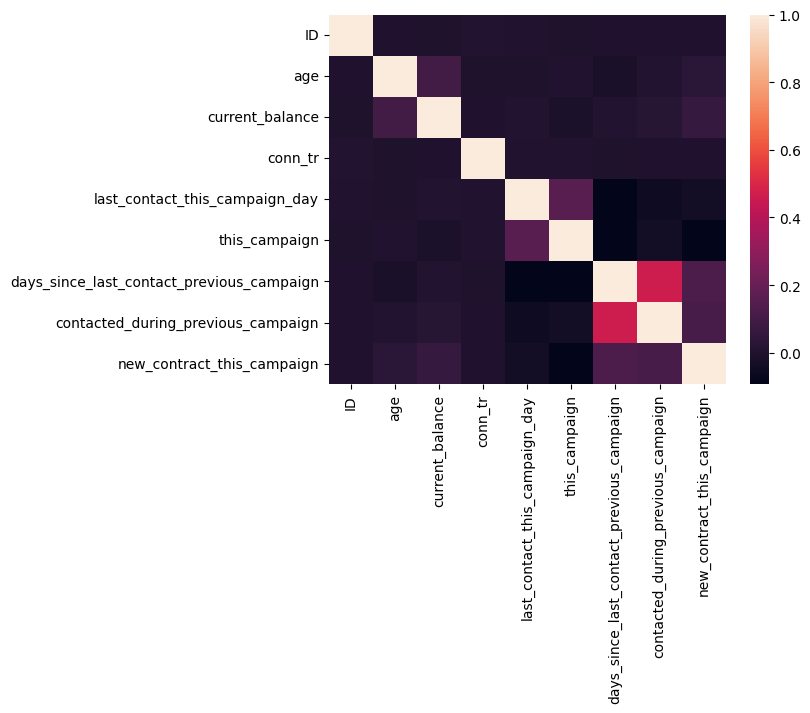

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(numeric_only=True), annot=False)
plt.show()